## Analyzing fitbit data from one person over a few months

### Project Plan

Goals 
- Label the data
- Predict the next two weeks

Hypothesis
- um

Label the person
- Derived the person's average step per mile. 
- Using openfit.com, determined the person was 5'10 based on their stride.

Label the fitbit ??
- Doesn't monitor heartrate

### Data Dictionary

In [1]:
# data manipulation
import pandas as pd
import numpy as np

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math
from datetime import datetime

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# py files for reproducibility 
import prepare
import explore
import split
# import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

Download csv files from "thumbdrive" with fitbit data

In excel, copy and pasted all activity logs into one file

Read in newly created csv file

In [2]:
df = pd.read_csv('activity_log.csv')

## Prepare

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566
1,4/27/18,"3,649","9,971",4.70,19,"1,158",219,46,17,"1,752"
2,4/28/18,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
3,4/29/18,"2,851","1,639",0.77,0,891,122,0,0,602
4,4/30/18,"2,825","1,323",0.62,0,880,104,0,0,540


Rename columns for ease-of-access and readability. 

Change the date to a datetime format, set as index, and sort. 

Remove commas from object columns and change to float columns.

In [4]:
df = prepare.get_fitbit_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
cal_burned             225 non-null float64
steps                  225 non-null float64
distance               225 non-null float64
floors                 225 non-null int64
mins_sedentary         225 non-null float64
mins_light_activity    225 non-null int64
mins_fair_activity     225 non-null int64
mins_very_active       225 non-null int64
activity_cals          225 non-null float64
dtypes: float64(5), int64(4)
memory usage: 27.6 KB


## Feature Engineering

Derive the total minutes of activity 

Pull out day of the week

In [6]:
df = prepare.add_features(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 11 columns):
cal_burned             225 non-null float64
steps                  225 non-null float64
distance               225 non-null float64
floors                 225 non-null int64
mins_sedentary         225 non-null float64
mins_light_activity    225 non-null int64
mins_fair_activity     225 non-null int64
mins_very_active       225 non-null int64
activity_cals          225 non-null float64
mins_total_activity    225 non-null int64
day                    225 non-null object
dtypes: float64(5), int64(5), object(1)
memory usage: 31.1+ KB


### Explore

### Split

Split our data using a cutoff date that is two weeks long

In [11]:
train, test = split.split_two_weeks(df,'D')

In [12]:
print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 225
Training Observations: 211
Testing Observations: 14


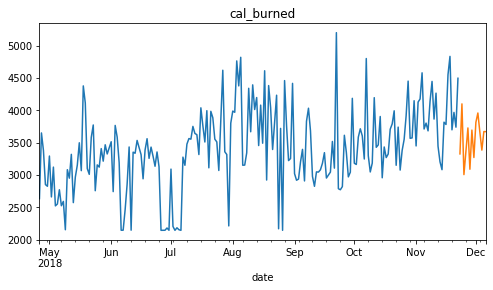

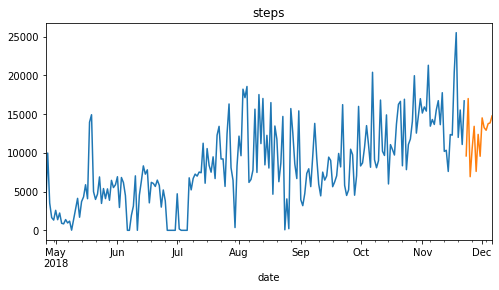

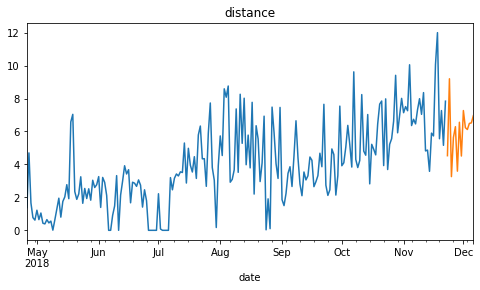

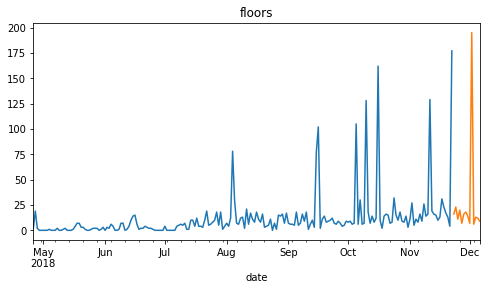

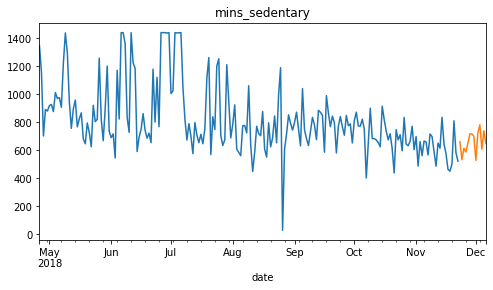

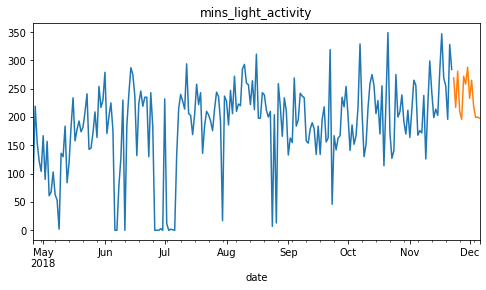

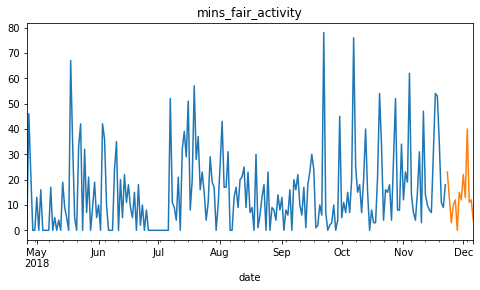

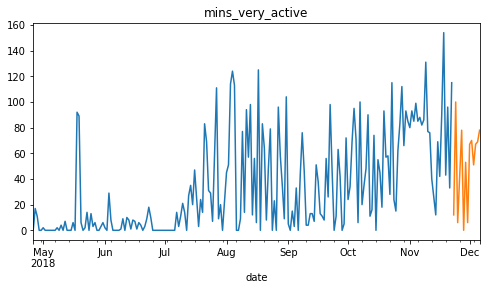

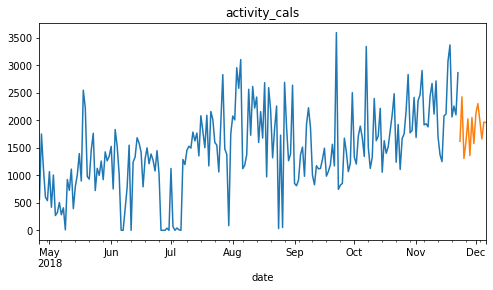

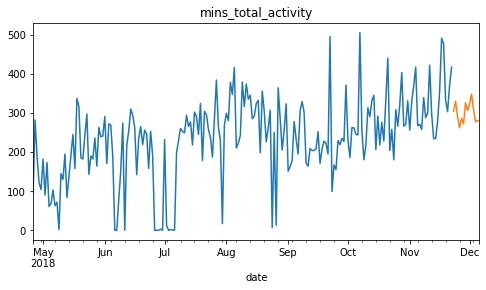

In [13]:
for col in df.select_dtypes(np.number): 
    plt.figure(figsize=(8, 4))
    train[col].plot()
    test[col].plot()
    plt.title("{}".format(col))
    plt.show()

### Model